In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#defining paths
# IMPORTANT: Please verify these paths match the exact location of your files in Google Drive.
# For example, if 'archive (4)' is directly inside 'data' without a 'project' subfolder,
# you might need to adjust the path like: "/content/drive/MyDrive/dsc-phase5-group/data/archive (4)/diet_recommendations_dataset.csv"
path_diet =  "/content/drive/MyDrive/dsc-phase5-group/project/data/archive (4)/diet_recommendations_dataset.csv"
path_injury = "/content/drive/MyDrive/dsc-phase5-group/project/data/archive (5)/multimodal_sports_injury_dataset.csv"
path_diabetes = "/content/drive/MyDrive/dsc-phase5-group/project/data/archive (6)/diabetes.csv"
path_synthetic_stroke = "/content/drive/MyDrive/dsc-phase5-group/data/archive (8)/synthetic_stroke_data.csv"


# --- Diagnostic Step: Verify file existence and path ---
# Check if the directory exists
data_directory = "/content/drive/MyDrive/dsc-phase5-group/project/data/" # Verify this base directory first
if not os.path.exists(data_directory):
    print(f"Error: Directory not found: {data_directory}")
    print("Please ensure the path to your data folder is correct in Google Drive.")
    print("You can also use `!ls /content/drive/MyDrive/` to see your Drive contents and adjust the path.")
else:
    print(f"Contents of {data_directory}:")
    for root, dirs, files in os.walk(data_directory):
        for name in files:
            print(os.path.join(root, name))
        for name in dirs:
            print(os.path.join(root, name))
# --- End of Diagnostic Step ---


# 2. Load the information into separate DataFrames
# This part will execute only if the paths are correct
try:
    df_diet = pd.read_csv(path_diet)
    df_injury = pd.read_csv(path_injury)
    df_diabetes = pd.read_csv(path_diabetes)
    df_synthetic_stroke = pd.read_csv(path_synthetic_stroke)

    # 3. Show the head of each dataset separately in the same cell
    print("---  DIET RECOMMENDATIONS ---")
    display(df_diet.head())

    print("\n---  SPORTS INJURY DATA ---")
    display(df_injury.head())

    print("\n---  DIABETES CLINICAL DATA ---")
    display(df_diabetes.head())

    print("\n---  SYNTHETIC STROKE DATA ---")
    display(df_synthetic_stroke.head())

    print("\nAll datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Failed to load a dataset. Please check the file paths: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Contents of /content/drive/MyDrive/dsc-phase5-group/project/data/:
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (7)
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (4)
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (5)
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (6)
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (7)/mturkfitbit_export_4.12.16-5.12.16
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (7)/mturkfitbit_export_3.12.16-4.11.16
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (7)/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (7)/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/content/drive/MyDrive/dsc-phase5-group/project/data/archive (7)/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv
/content/drive/MyDrive/dsc-phase5-gr

In [ ]:
#Handling the data
#checking for misssing values
def check_missing (df,name):
  print(f"\n----Missing values in {name}---")
  print(df.isnull().sum())

check_missing(df_diet,'diet')
check_missing(df_injury,'injury')
check_missing(df_diabetes,'diabetes')
#


----Missing values in diet---
Patient_ID                            0
Age                                   0
Gender                                0
Weight_kg                             0
Height_cm                             0
BMI                                   0
Disease_Type                        204
Severity                              0
Physical_Activity_Level               0
Daily_Caloric_Intake                  0
Cholesterol_mg/dL                     0
Blood_Pressure_mmHg                   0
Glucose_mg/dL                         0
Dietary_Restrictions                334
Allergies                           323
Preferred_Cuisine                     0
Weekly_Exercise_Hours                 0
Adherence_to_Diet_Plan                0
Dietary_Nutrient_Imbalance_Score      0
Diet_Recommendation                   0
dtype: int64

----Missing values in injury---
athlete_id                 0
heart_rate               354
body_temperature           0
hydration_level          385
sleep_q

With this information we will drop gait_speed and muscle activity since we will not be needing them.

In [ ]:
df_injury.drop (['gait_speed', 'muscle_activity'], axis=1, inplace=True)

print("Columns dropped! New column list:Injury")
print (df_injury.columns)
print("Columns dropped! New column list: Diabetes")
print (df_diabetes.columns)
print("Columns dropped! New column list: Diet")
print (df_diet.columns)

In [ ]:
!ls /content/drive/MyDrive/

There other columns with missing values that we will need and can not drop, so we have to fill in the gaps

In [ ]:

df_diet['Disease_Type'].fillna('Healthy', inplace=True)
df_diet['Dietary_Restrictions'].fillna('None', inplace=True)
df_diet['Allergies'].fillna('None', inplace=True)

# Double check
print(df_diet.isnull().sum())

Patient_ID                          0
Age                                 0
Gender                              0
Weight_kg                           0
Height_cm                           0
BMI                                 0
Disease_Type                        0
Severity                            0
Physical_Activity_Level             0
Daily_Caloric_Intake                0
Cholesterol_mg/dL                   0
Blood_Pressure_mmHg                 0
Glucose_mg/dL                       0
Dietary_Restrictions                0
Allergies                           0
Preferred_Cuisine                   0
Weekly_Exercise_Hours               0
Adherence_to_Diet_Plan              0
Dietary_Nutrient_Imbalance_Score    0
Diet_Recommendation                 0
dtype: int64


/tmp/ipython-input-467/1530676188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diet['Disease_Type'].fillna('Healthy', inplace=True)
/tmp/ipython-input-467/1530676188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
#numerical gaps

cols_to_fix = ['heart_rate', 'hydration_level', 'sleep_quality', 'training_intensity']

for col in cols_to_fix:
    median_val = df_injury[col].median()
    df_injury[col].fillna(median_val, inplace=True)

print("Numerical gaps filled in injury dataset.")

Numerical gaps filled in injury dataset.


/tmp/ipython-input-467/3784367317.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_injury[col].fillna(median_val, inplace=True)


In [ ]:
# Check for common IDs
common_ids = set(df_injury['athlete_id']).intersection(set(df_diet['Patient_ID']))

print(f"Number of matching IDs between Injury and Diet: {len(common_ids)}")

if len(common_ids) > 0:
    print("MATCH FOUND! We can merge these datasets.")
else:
    print("NO MATCH. These are different people. We should analyze them as two separate 'modules' in your app.")

Number of matching IDs between Injury and Diet: 0
NO MATCH. These are different people. We should analyze them as two separate 'modules' in your app.


Data understanding

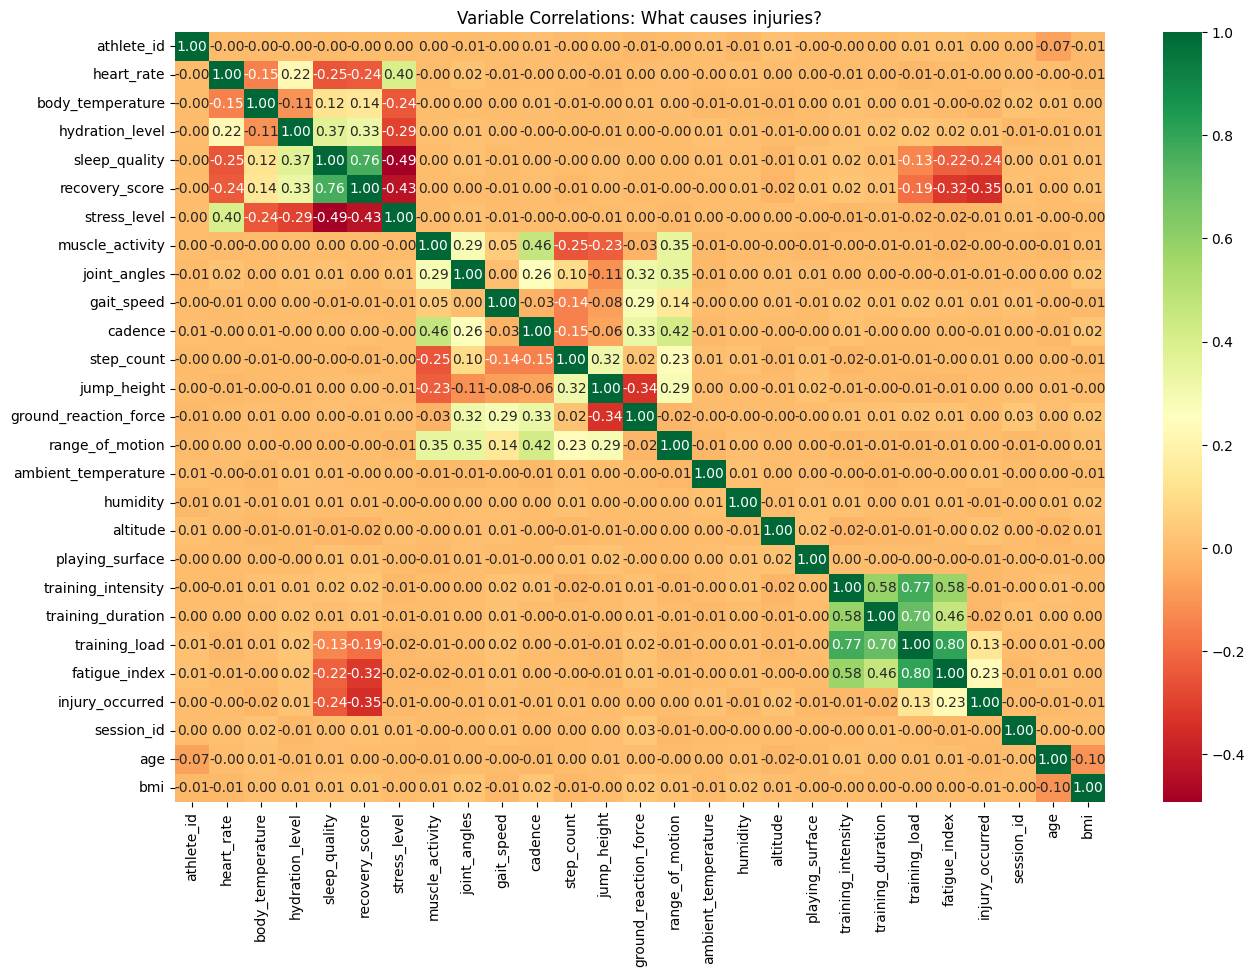

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

sns.heatmap(df_injury.select_dtypes(include=[np.number]).corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Variable Correlations: What causes injuries?")
plt.show()

Risk changes with age


In [ ]:
import pandas as pd

#age grouping to see who is more risky
df_injury['age_group'] = pd.cut(df_injury['age'], bins=[0,25,45,65,90], labels=['Gen Z','Millenials', 'Gen X', 'Senior'])

#pivot table to use injury rate by age and gender
pivot =  df_injury.pivot_table(index='age_group', columns='gender', values='injury_occurred', aggfunc='mean')
print("Injury Probability by age and genger:")
display(pivot)

#

Injury Probability by age and genger:


/tmp/ipython-input-467/109163110.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot =  df_injury.pivot_table(index='age_group', columns='gender', values='injury_occurred', aggfunc='mean')


gender,Female,Male
age_group,,
Gen Z,0.530617,0.502603
Millenials,0.500298,0.505370


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=pivot)

https://docs.google.com/spreadsheets/d/1IUIJkn2vn09KykoWM8GKWuPQjLqNtFokesAQw1LfNYU/edit#gid=0


In [ ]:
# Recovery score:High sleep and low stress = High Recovery
# We normalize it to be out of 100
df_injury['AI_Recovery_Score'] = ((df_injury['sleep_quality'] + (10 - df_injury['stress_level'])) / 20) * 100

print("Sample Recovery Scores:")
display(df_injury[['sleep_quality', 'stress_level', 'AI_Recovery_Score']].head())


Sample Recovery Scores:


,sleep_quality,stress_level,AI_Recovery_Score
0,5.466370,0.375825,75.452726
1,6.899090,0.279165,83.099628
2,9.574152,0.334061,96.200453
3,7.614297,0.218766,86.977657
4,5.631979,0.484086,75.739465


In [ ]:
print("Injury Distribution:")
print(df_injury['injury_occurred'].value_counts(normalize=True))

print("\nDiabetes Distribution:")
print(df_diabetes['Outcome'].value_counts(normalize=True))

Injury Distribution:
injury_occurred
0    0.639948
1    0.209987
2    0.150065
Name: proportion, dtype: float64

Diabetes Distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


Step 3. Feature Engineering Creating personas so as to have reference points.

Model Accuracy: 67.57%

Classification Report (Precision = 'How often is the alarm right?'):
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      2015
           1       0.17      0.00      0.01       635
           2       0.56      0.41      0.47       434

    accuracy                           0.68      3084
   macro avg       0.47      0.45      0.42      3084
weighted avg       0.56      0.68      0.59      3084



/tmp/ipython-input-467/676795404.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


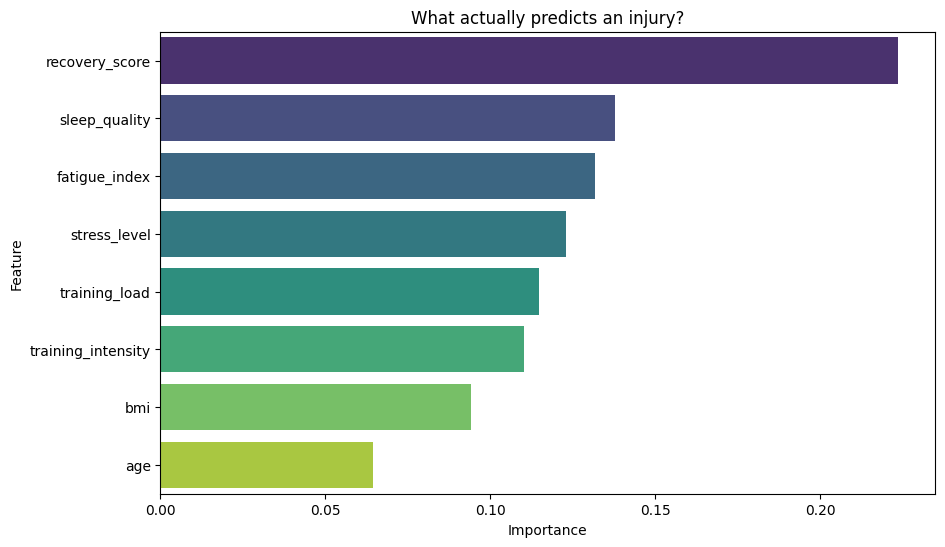

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Define the "Early Warning" Features ---
# These are the signals that change *before* an injury occurs.
features = [
    'training_load',        # How hard they worked
    'training_intensity',   # How intense the session was
    'recovery_score',       # Did they sleep/recover?
    'fatigue_index',        # Accumulated tiredness
    'stress_level',         # Mental/Physical stress
    'calories',             # Energy expenditure (proxy for work done)
    'duration_min'
]

actual_features = ['training_load', 'training_intensity', 'recovery_score',
                   'fatigue_index', 'stress_level', 'sleep_quality', 'age', 'bmi']

X = df_injury[actual_features]
y = df_injury['injury_occurred']  # 1 = Injury, 0 = No Injury

# --- 2. Split into "Past Data" (Train) and "Future Data" (Test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Train the "Coach AI" (Random Forest) ---
# We use Random Forest because it handles complex interactions (e.g., High Load is okay IF Recovery is High)
injury_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
injury_model.fit(X_train, y_train)

# --- 4. Test the Model ---
y_pred = injury_model.predict(X_test)

# --- 5. The Results ---
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report (Precision = 'How often is the alarm right?'):")
print(classification_report(y_test, y_pred))

# --- 6. The "Why?" (Feature Importance) ---
# This tells us WHAT is causing the injuries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.DataFrame({
    'Feature': actual_features,
    'Importance': injury_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("What actually predicts an injury?")
plt.show()

In [ ]:
# --- Feature Engineering: Creating the "ACWR" Signal ---

# 1. Sort by Athlete and Date (Crucial for rolling averages)
# Assuming you have a 'date' column. If not, we rely on the existing order or session_id
if 'date' in df_injury.columns:
    df_injury['date'] = pd.to_datetime(df_injury['date'])
    df_injury = df_injury.sort_values(by=['athlete_id', 'date'])

# 2. Calculate "Acute Load" (What they did this week)
# We use a 7-day rolling average of 'training_load'
df_injury['acute_load'] = df_injury.groupby('athlete_id')['training_load'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# 3. Calculate "Chronic Load" (What they are used to - last 28 days)
df_injury['chronic_load'] = df_injury.groupby('athlete_id')['training_load'].transform(
    lambda x: x.rolling(window=28, min_periods=1).mean()
)

# 4. Create the "ACWR" Ratio (The Magic Number)
# Ratio > 1.5 usually means "High Injury Risk" (Doing way more than used to)
df_injury['acwr'] = df_injury['acute_load'] / (df_injury['chronic_load'] + 1) # +1 avoids division by zero

# 5. Create "Fatigue Trend"
# Is their fatigue rising over the last 3 days?
df_injury['fatigue_trend'] = df_injury.groupby('athlete_id')['fatigue_index'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

print("New Features Created: 'acwr', 'acute_load', 'chronic_load', 'fatigue_trend'")

New Features Created: 'acwr', 'acute_load', 'chronic_load', 'fatigue_trend'


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# 1. Define your X and y (same as before)
# Ensure 'actual_features' contains all your columns including age, bmi, training_load etc.
X = df_injury[actual_features]
y = df_injury['injury_occurred']

# 2. Split FIRST (Critical Step)
# We must split before resampling to prevent "data leakage" (cheating)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply SMOTE to the TRAINING data only
# This creates the "fake injuries" for the model to study
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Training Size: {len(X_train)}")
print(f"New 'Balanced' Training Size: {len(X_train_resampled)}")
# You should see the size increase significantly

# 4. Train the Random Forest on the NEW, Balanced data
injury_model = RandomForestClassifier(n_estimators=100, random_state=42)
injury_model.fit(X_train_resampled, y_train_resampled)

# 5. Test on the REAL (unseen) test data
y_pred = injury_model.predict(X_test)

# 6. Check Results
print("\n--- FINAL RESULTS WITH SMOTE ---")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

Original Training Size: 12336
New 'Balanced' Training Size: 23559

--- FINAL RESULTS WITH SMOTE ---
Model Accuracy: 55.03%
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      2015
           1       0.22      0.20      0.21       635
           2       0.40      0.65      0.50       434

    accuracy                           0.55      3084
   macro avg       0.44      0.50      0.46      3084
weighted avg       0.57      0.55      0.55      3084



--- DIABETES RISK MAP (Probability of Outcome=1) ---


/tmp/ipython-input-467/2401293396.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  diabetes_risk_map = df_diabetes.pivot_table(


bmi_category,Underweight,Normal,Overweight,Obese
age_group,,,,
Gen Z,0.0%,2.0%,4.3%,29.7%
Millennials,0.0%,5.4%,36.2%,50.8%
Gen X,nan%,22.2%,46.2%,61.7%
Senior,nan%,0.0%,0.0%,80.0%


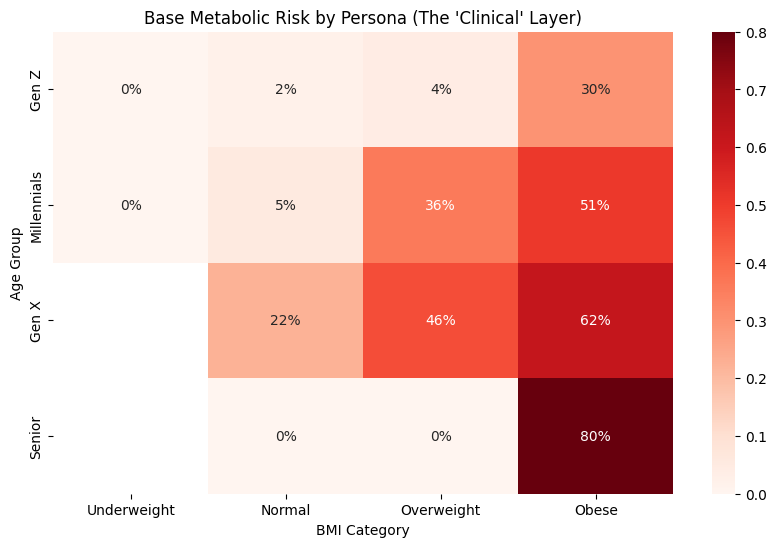

In [ ]:
# --- 1. Standardization (Matching the Injury Dataset) ---
# Lowercase all columns to match df_injury
df_diabetes.columns = df_diabetes.columns.str.lower()

# Rename for clarity if needed (e.g., 'outcome' is 'diabetes_risk')
df_diabetes.rename(columns={'outcome': 'diabetes_risk'}, inplace=True)

# --- 2. Create the "Persona" Buckets ---
# We use the EXACT same bins as the Injury dataset to allow for merging later
df_diabetes['age_group'] = pd.cut(df_diabetes['age'],
                                  bins=[0, 25, 45, 65, 100],
                                  labels=['Gen Z', 'Millennials', 'Gen X', 'Senior'])

df_diabetes['bmi_category'] = pd.cut(df_diabetes['bmi'],
                                     bins=[0, 18.5, 25, 30, 100],
                                     labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# --- 3. The "Risk Engine" Calculation ---
# This Pivot Table is your "Model". It tells you the % chance of diabetes for each group.
# We map this probability back to your Athletes/Fitbit users later.
diabetes_risk_map = df_diabetes.pivot_table(
    index='age_group',
    columns='bmi_category',
    values='diabetes_risk',
    aggfunc='mean' # Calculates the probability (0 to 1)
)

print("--- DIABETES RISK MAP (Probability of Outcome=1) ---")
display(diabetes_risk_map.style.background_gradient(cmap='Reds', axis=None).format("{:.1%}"))

# --- 4. Visualizing the "Danger Zones" ---
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_risk_map, annot=True, fmt=".0%", cmap='Reds')
plt.title("Base Metabolic Risk by Persona (The 'Clinical' Layer)")
plt.xlabel("BMI Category")
plt.ylabel("Age Group")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# 1️⃣ Convert to Binary
df_injury['injury_binary'] = df_injury['injury_occurred'].apply(
    lambda x: 0 if x == 0 else 1
)

X = df_injury[[
    'training_load',
    'training_intensity',
    'recovery_score',
    'fatigue_index',
    'stress_level',
    'sleep_quality',
    'age',
    'bmi'
]]

y = df_injury['injury_binary']

# 2️⃣ Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3️⃣ Compute imbalance ratio
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# 4️⃣ XGBoost Model (Better than RF here)
model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# 5️⃣ Predictions
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1974
           1       0.53      0.51      0.52      1110

    accuracy                           0.66      3084
   macro avg       0.63      0.63      0.63      3084
weighted avg       0.66      0.66      0.66      3084

[[1476  498]
 [ 547  563]]


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 66.12%


In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 66.12%


In [ ]:
# ============================
# DEPLOYABLE INJURY MODEL WITH SYNTHETIC DATA
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import joblib

# ----------------------------
# 1️⃣ Base Features
# ----------------------------
features = [
    'training_load',
    'training_intensity',
    'recovery_score',
    'fatigue_index',
    'stress_level',
    'sleep_quality',
    'age',
    'bmi'
]

X = df_injury[features].copy()
y = df_injury['injury_occurred'].apply(lambda x: 0 if x == 0 else 1)  # binary

# ----------------------------
# 2️⃣ Synthetic Data Generation (Minority class)
# ----------------------------
minority = df_injury[df_injury['injury_occurred'] == 1]
n_synth = len(df_injury[df_injury['injury_occurred'] == 0]) - len(minority)

synthetic = minority.sample(n=n_synth, replace=True).copy()
for col in features:
    noise = np.random.normal(0, 0.05 * synthetic[col].std(), size=synthetic.shape[0])
    synthetic[col] = synthetic[col] + noise

# Combine original + synthetic
df_augmented = pd.concat([df_injury, synthetic], ignore_index=True)
X_aug = df_augmented[features]
y_aug = df_augmented['injury_occurred'].apply(lambda x: 0 if x == 0 else 1)

# ----------------------------
# 3️⃣ Feature Engineering
# ----------------------------
X_aug['fatigue_load'] = X_aug['fatigue_index'] * X_aug['training_load']
X_aug['recovery_ratio'] = X_aug['recovery_score'] / (X_aug['training_load'] + 1)
X_aug['sleep_deficit'] = 10 - X_aug['sleep_quality']
X_aug['stress_fatigue'] = X_aug['stress_level'] * X_aug['fatigue_index']
X_aug['cumulative_load'] = X_aug['training_load'].expanding().mean()
X_aug['cumulative_fatigue'] = X_aug['fatigue_index'].expanding().mean()
X_aug['cumulative_recovery'] = X_aug['recovery_score'].expanding().mean()

# ----------------------------
# 4️⃣ Train/Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_aug, y_aug,
    test_size=0.2,
    stratify=y_aug,
    random_state=42
)

# ----------------------------
# 5️⃣ Imbalance Ratio
# ----------------------------
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
print(f"Scale pos weight: {scale_pos_weight:.2f}")

# ----------------------------
# 6️⃣ Train XGBoost
# ----------------------------
model = XGBClassifier(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    subsample=0.85,
    colsample_bytree=0.85,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train, verbose=False)

# ----------------------------
# 7️⃣ Predict Probabilities
# ----------------------------
y_probs = model.predict_proba(X_test)[:,1]

# ----------------------------
# 8️⃣ Threshold Tuning
# ----------------------------
thresholds = np.arange(0.35, 0.55, 0.01)
best_acc = 0
best_thresh = 0.5

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_t)
    if acc > best_acc:
        best_acc = acc
        best_thresh = t

print(f"\nBest threshold for accuracy: {best_thresh:.2f}, Accuracy: {best_acc:.2%}")

y_pred = (y_probs >= best_thresh).astype(int)

# ----------------------------
# 9️⃣ Risk Score / Category
# ----------------------------
risk_score = y_probs
risk_category = pd.cut(
    risk_score,
    bins=[0, 0.3, 0.6, 1.0],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

risk_df = pd.DataFrame({
    "Risk Score": risk_score,
    "Risk Category": risk_category
})
print("\nSample Risk Scores:")
print(risk_df.head(10))

# ----------------------------
# 🔹 Evaluation
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ----------------------------
# 🔹 Save Model
# ----------------------------
joblib.dump(model, "injury_risk_model_synth.pkl")
print("\n✅ Model saved as injury_risk_model_synth.pkl")


/tmp/ipython-input-467/3344626757.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug['fatigue_load'] = X_aug['fatigue_index'] * X_aug['training_load']
/tmp/ipython-input-467/3344626757.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug['recovery_ratio'] = X_aug['recovery_score'] / (X_aug['training_load'] + 1)
/tmp/ipython-input-467/3344626757.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Scale pos weight: 0.81

Best threshold for accuracy: 0.53, Accuracy: 76.67%

Sample Risk Scores:
   Risk Score Risk Category
0    0.998006     High Risk
1    0.208847      Low Risk
2    0.348891   Medium Risk
3    0.453990   Medium Risk
4    0.381770   Medium Risk
5    0.247381      Low Risk
6    0.584293   Medium Risk
7    0.988502     High Risk
8    0.569604   Medium Risk
9    0.272104      Low Risk

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      1974
           1       0.88      0.67      0.76      2436

    accuracy                           0.77      4410
   macro avg       0.78      0.78      0.77      4410
weighted avg       0.79      0.77      0.77      4410


Confusion Matrix:
[[1751  223]
 [ 806 1630]]

✅ Model saved as injury_risk_model_synth.pkl


In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 76.51%
